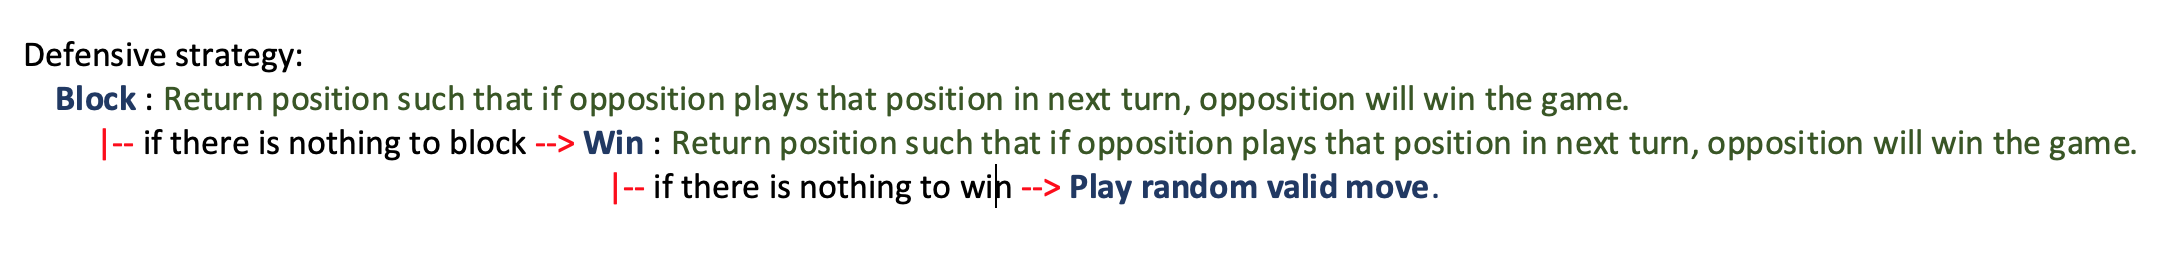

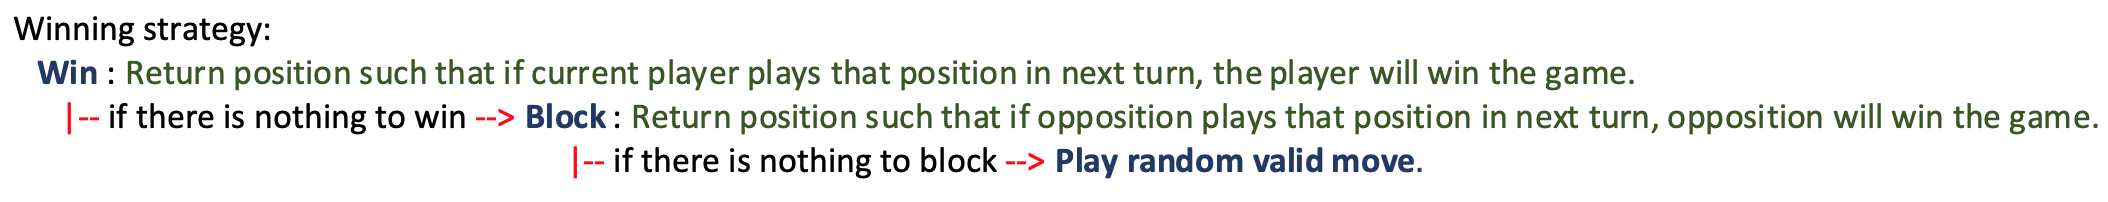

In [ ]:
import random

TARGET_VALUE = 15

#This is a key-value pair, not a board. Each key has its value, like hashing. In our case it's a dictionary. 
def reset_board():
    return {'2': None, '7': None, '6': None,
            '9': None, '5': None, '1': None,
            '4': None, '3': None, '8': None}


# Return true if the passed move is free on the passed board.
def isSpaceFree(board, position): # 
    if position not in board.keys():
        return False
    return board[position] is None


# Given a board and a player’s letter, this function returns True if that player has won.
# We use bo instead of board and le instead of letter so we don’t have to type as much.
def isWinner(board, player):
    player_values = [int(key) for key, value in board.items() if value == player]
    return True if sum(player_values) == TARGET_VALUE else False


# Test winning move
def testWinMove(board: dict, player: int, position: str):
    temp_board = board.copy() 
    temp_board[position] = player
    return isWinner(temp_board, player)


# Returns a valid move from the passed list on the passed board.
# Returns None if there is no valid move.
def chooseRandomMove(board, player):
    possibleMoves = [position for position, value in board.items() if value is None]
    player_moves = [int(position) for position, value in board.items() if value is player]
    valid_moves = [value for value in possibleMoves if sum(player_moves) + int(value) <= TARGET_VALUE]
    if len(valid_moves) > 0:
        return random.choice(valid_moves)
    else:
        return ''


def get_winning_position(board, player):
    for position in range(1, 10):
        # checking if the board is free and if the move is a win move. 
        if isSpaceFree(board, str(position)) and testWinMove(board, player, str(position)):
            return str(position)
    return ''


def Strategy(board, player, opposition, strategy):
    if strategy == 'Defensive':
        position = get_winning_position(board, opposition) # blocking
        if len(position) != 0 and sum([int(key) for key, value in board.items() if value is player]) + int(
                position) > TARGET_VALUE:
            position = ''
        if len(position) == 0:
            position = get_winning_position(board, player) # if you can't block, try to win
        return position
    elif strategy == 'Winning':
        position = get_winning_position(board, player)
        if len(position) == 0:
            position = get_winning_position(board, opposition)
            if len(position) != 0 and sum([int(key) for key, value in board.items() if value is player]) + int(
                    position) > TARGET_VALUE:
                position = ''
        return position


def BotPlay(board, player: int, strategy):
    # determine opposition player
    if player == 1:
        opposition = 2
    else:
        opposition = 1
        
    # Try to implement strategy 
    strategy_resultant_position = Strategy(board, player, opposition, strategy)
    if len(strategy_resultant_position) > 0:
        return strategy_resultant_position
    
    # if the strategy does not work, play randomly from the possible moves
    # Move on one of the sides.
    return chooseRandomMove(board, player)


def printResult(board):
    player_one = [int(key) for key, value in board.items() if value == 1]
    player_two = [int(key) for key, value in board.items() if value == 2]
    print(display_score(player_one))
    print(display_score(player_two))
    print()

# do not touch it does display score only
def display_score(player):
    out = ''
    for key in player:
        out += '{}, '.format(str(key))

    if len(out) > 2:
        out = out[:-2] + ' sum = {}'.format(str(sum(player)))
    return out


# Let the player type in their move.
def getPlayerMove(board, player):
    move = ''
    possibleMoves = [position for position, value in board.items() if value is None]
    player_moves = [int(position) for position, value in board.items() if value is player]
    valid_moves = [value for value in possibleMoves if sum(player_moves) + int(value) <= TARGET_VALUE]

    if len(valid_moves) == 0:
        return ''

    while move not in '1 2 3 4 5 6 7 8 9'.split() or not isSpaceFree(board, move) or move not in valid_moves:
        if len(move) != 0:
            print('The number {} has taken by your opponent'.format(move))
            if move not in valid_moves:
                print('Sum of your past numbers and {} exceeds {}. Your valid moves are given below'.format(move,TARGET_VALUE))
                print(valid_moves)
        move = input('What is your next number? (1-9)\n')
    return move


# Main
# Start reading explanation here first
# 3rd strategy should be added here. 
  
def play():
    print('Welcome to Number Scrabble Game!')
    Defensive = "Defensive"
    Winning = "Winning"
    
    while True:
        # Reset the board
        theBoard = reset_board()
        
        # Decide who will play - default properties - player, bot, strategy of the players 
        playerOne, playerTwo = dict(player=1, bot=False, strategy=""), dict(player=2, bot=False, strategy="")
        playerOne['bot'] = True if input('Is Player 1 bot? (y/n)\n').lower() == 'y' else False
        
        # Define strategy for bots - defensive, winning, add other strategies on the way.
        if playerOne['bot']:
            playerOne['strategy'] = Defensive if input('What is the strategy for Player 1(bot)? (d - Defensive, '
                                                       'w - Winning)\n').lower() == 'd' else Winning
        playerTwo['bot'] = True if input('Is Player 2 bot? (y/n)\n').lower() == 'y' else False
        if playerTwo['bot']:
            playerTwo['strategy'] = Defensive if input('What is the strategy for Player 2(bot)? (d - Defensive, '
                                                       'w - Winning)\n').lower() == 'd' else Winning
        # decide who will start the game first
        # turn will be recognised as dictionary in the runtime. Randomly choose who will start the game first - 
        # turn has the player properties. turn will be either player1 or player2.
        turn: dict = random.choice([playerOne, playerTwo])
        print('The Player {} will go first.'.format(turn.get('player')))

        while True: # we want to loop whatsoever, breakout the loop if it hits exit condition

            printResult(theBoard)
            
            # Get the move of the current player
            if turn.get('bot'): # check if the current player is bot
                move = BotPlay(theBoard, turn.get('player'), turn.get('strategy')) 
            else:
                move = getPlayerMove(theBoard, turn.get('player'))
            if move in theBoard.keys():
                theBoard[move] = turn.get('player')
            else:
                turn = playerTwo if turn.get('player') == 1 else playerOne
            
            # Check the exit condition
            if move not in theBoard.keys() or isWinner(theBoard, turn.get('player')):
                printResult(theBoard)
                if turn.get('bot'):
                    print('Player {} (bot) has won the match with the strategy: {}'.format(turn.get('player'),
                                                                                           turn.get('strategy')))
                else:
                    print('Hooray! Player {} has won the game!'.format(turn.get('player')))
                break
            else:
                # set the next player as a turn
                turn = playerTwo if turn.get('player') == 1 else playerOne

        if input('Do you want to play again? (y/n)\n').lower() == 'n':
            break


if __name__ == '__main__':
    play()


Welcome to Number Scrabble Game!
Is Player 1 bot? (y/n)
y
What is the strategy for Player 1(bot)? (d - Defensive, w - Winning)
d
Is Player 2 bot? (y/n)
y
What is the strategy for Player 2(bot)? (d - Defensive, w - Winning)
d
The Player 2 will go first.




6 sum = 6

9 sum = 9
6 sum = 6

9 sum = 9
2, 6 sum = 8

9, 1 sum = 10
2, 6 sum = 8

9, 1 sum = 10
2, 6, 5 sum = 13

9, 1, 3 sum = 13
2, 6, 5 sum = 13

9, 1, 3 sum = 13
2, 6, 5 sum = 13

Player 1 (bot) has won the match with the strategy: Defensive
